In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set()

In [46]:
def download_data(code_bss, start_date='2021-10-15', end_date='2022-01-15', size=93):
    """Download the measures between a starting and and end date
    """
    url = f'https://hubeau.eaufrance.fr/api/v1/niveaux_nappes/chroniques.csv?code_bss={code_bss}&size={size}&sort=asc&date_debut_mesure={start_date}&date_fin_mesure={end_date}'
    data = pd.read_csv(url, delimiter=';', index_col='date_mesure', parse_dates=['date_mesure'])
    return data

In [14]:
performances = pd.read_csv('performances.csv', index_col=0)
performances = performances.rename(columns={
    'val_loss': 'Validation loss',
    'test_loss': 'Test loss',
    'best_model_at_test': 'Best model',
    'runtime_in_sec': 'Running time (s)'
})
performances

,Validation loss,Test loss,Best model,Running time (s)
00471X0095/PZ2013,0.168768,0.197973,conv,152.925709
00487X0015/S1,0.015693,0.013800,conv,137.159117
00755X0006/S1,0.006993,0.018619,conv,175.947871
00762X0004/S1,0.002379,0.005072,conv,165.868625
00766X0004/S1,0.083881,0.116865,conv,156.681293
01258X0020/S1,0.008772,0.030382,conv,252.996546
01516X0004/S1,0.017034,0.008552,Resnet,269.471629
01584X0023/LV3,0.211561,0.443117,conv,888.663592
02206X0022/S1,0.040808,0.061869,Resnet,2425.674793
02267X0030/S1,0.004580,0.005598,Resnet,208.766104


In [47]:
#performances.to_latex('performances.tex', float_format="%.2f")

In [15]:
performances.groupby('Best model').count()

,Validation loss,Test loss,Running time (s)
Best model,,,
Resnet,3,3,3
conv,9,9,9
lstm,6,6,6


In [17]:
submission

,DATE,NIVEAU_PIEZO
CODE_BSS,,
00471X0095/PZ2013,2021-10-15,62.566362
00471X0095/PZ2013,2021-10-16,62.232551
00471X0095/PZ2013,2021-10-17,62.249174
00471X0095/PZ2013,2021-10-18,61.985632
00471X0095/PZ2013,2021-10-19,62.068940
...,...,...
07476X0029/S,2022-01-11,298.530113
07476X0029/S,2022-01-12,298.880474
07476X0029/S,2022-01-13,298.925868


In [20]:
ground_truth = download_data('00471X0095/PZ2013')[['niveau_nappe_eau']]
ground_truth

,niveau_nappe_eau
date_mesure,
2021-10-15,64.89
2021-10-16,64.87
2021-10-17,64.87
2021-10-18,64.86
2021-10-19,64.85
...,...
2022-01-10,67.06
2022-01-11,67.25
2022-01-12,67.41


In [29]:
from sklearn.metrics import mean_squared_error

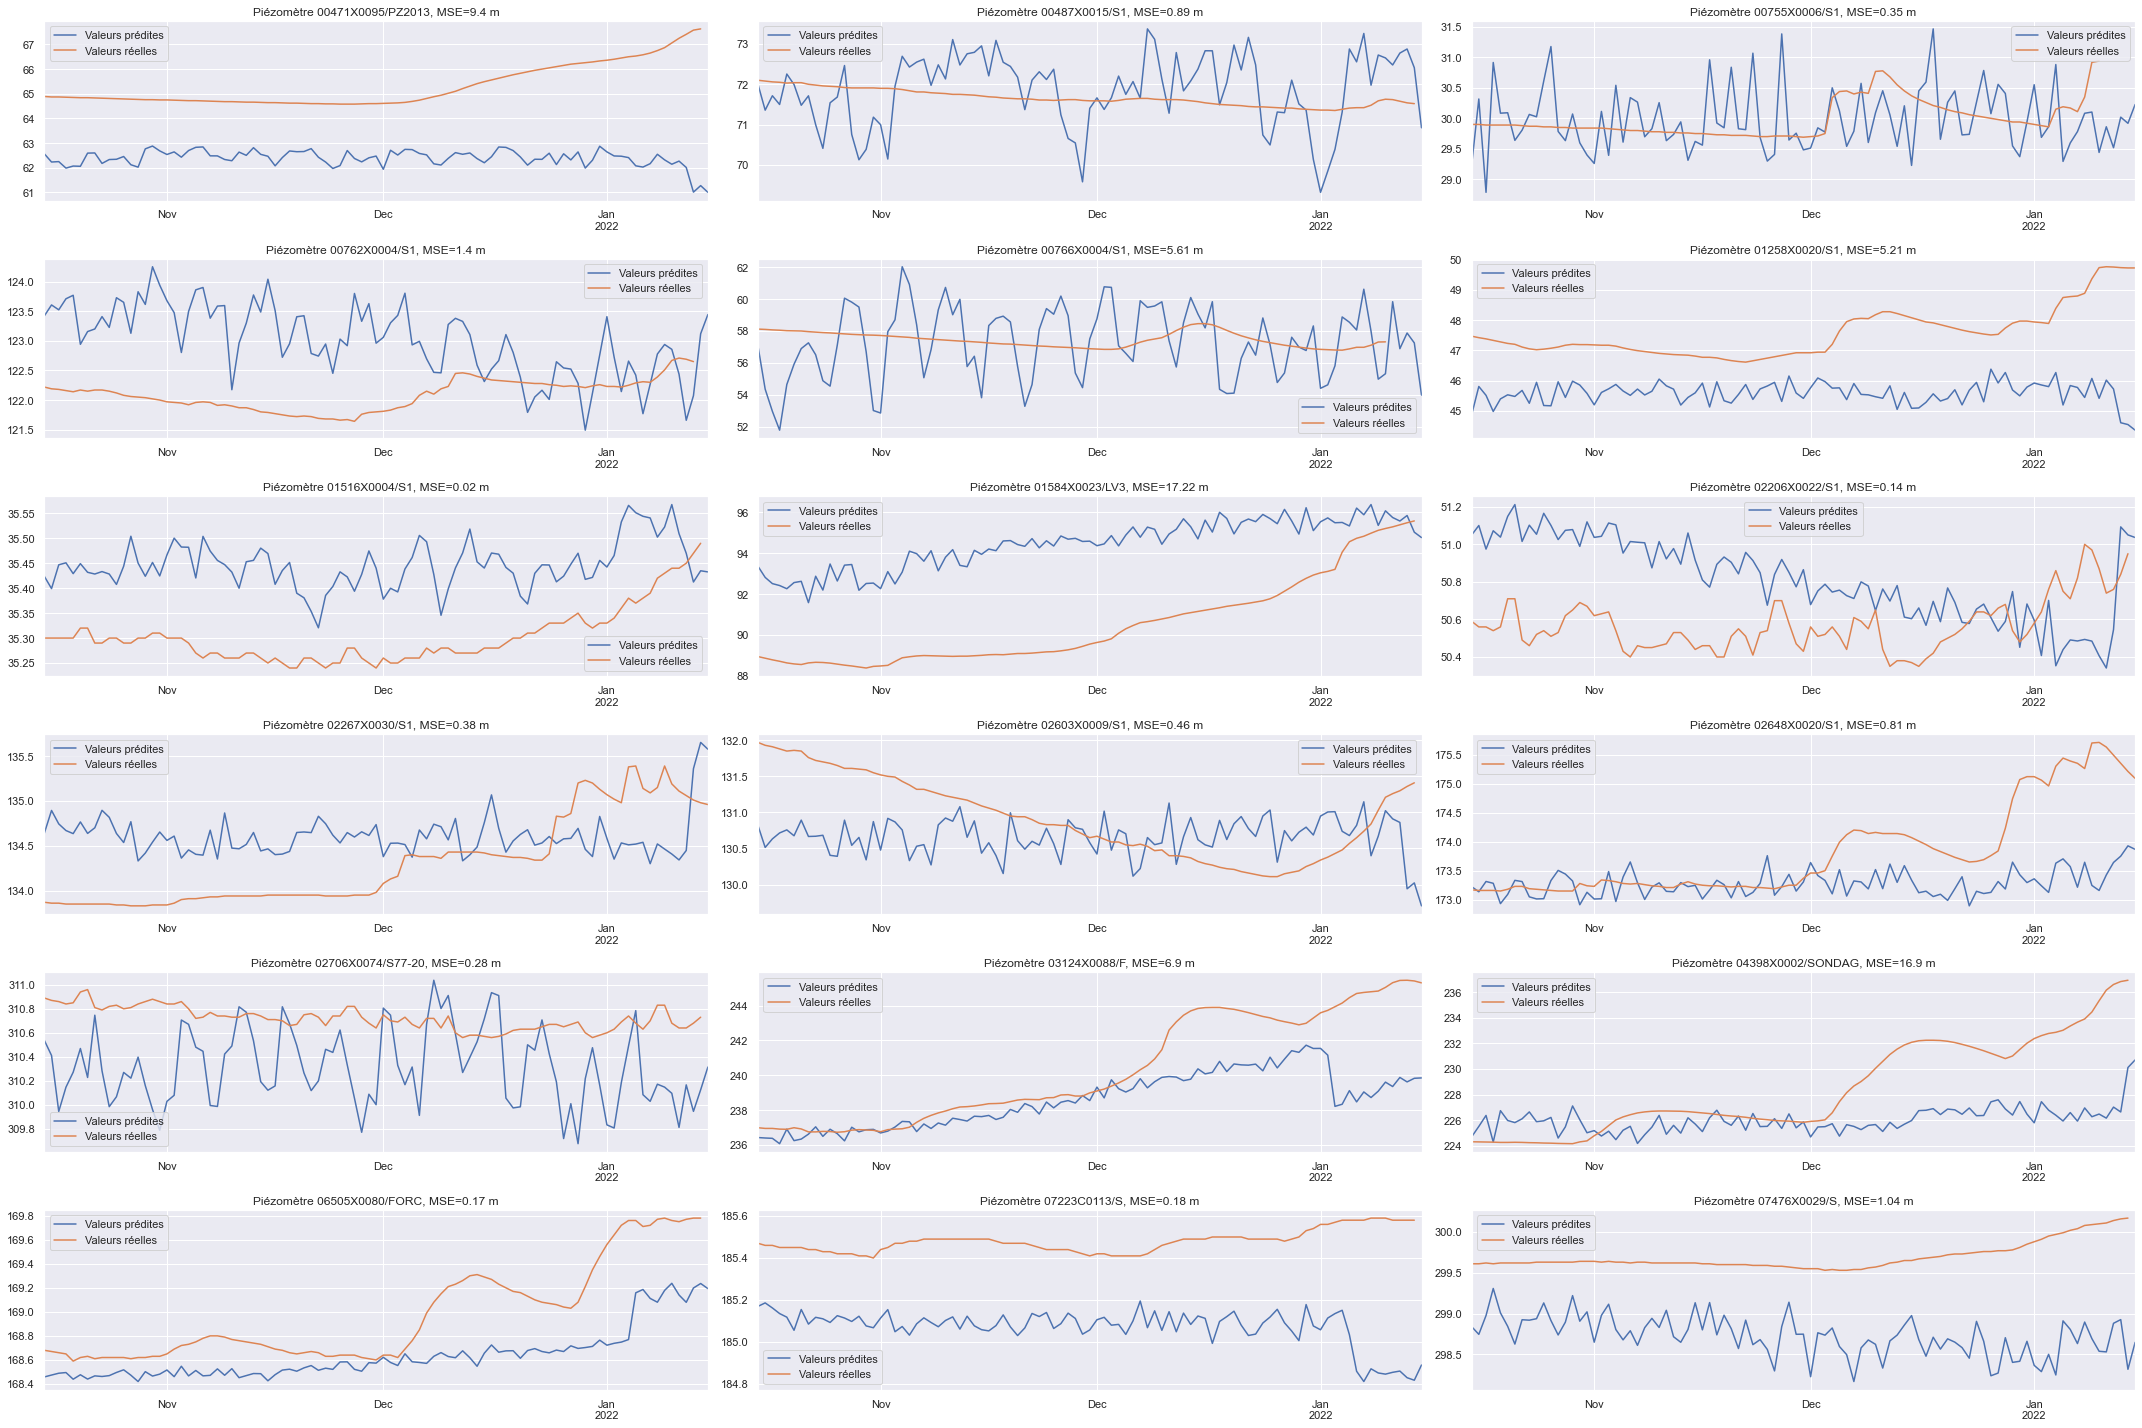

In [56]:
submission = pd.read_csv('submission.csv', index_col=0)
submission.DATE = pd.to_datetime(submission.DATE)

nrows = 6
ncols = 3

plt.figure(figsize=(30, 20))

for i, code in enumerate(performances.index):
    df = submission[submission.index==code]
    df = df.set_index('DATE')
    
    df_ground_truth = download_data(code)[['niveau_nappe_eau']]
    
    # Let's computes the mse for the dates which have ground truth measures
    mse = mean_squared_error(df_ground_truth, df.loc[df_ground_truth.index])
    
    ax = plt.subplot(nrows, ncols, i+1)
    df.plot(ax=ax, title=f'Piézomètre {code}, MSE={round(mse, 2)} m', xlabel='')
    
    df_ground_truth.plot(ax=ax, label='Valeurs réelles', xlabel='')
    
    ax.legend(['Valeurs prédites', 'Valeurs réelles'])

plt.tight_layout()
plt.savefig('Images/forecasts-with-ground-truth.png')